  # Learning from Disaster: Titanic
  This notebook is dedicated to analyzing data from a horrible tragedy of titanic, it will demonstarate how to:  

1.   **Access kaggle datasets from Google Colab**
2.   **Create a pandas dataframe from CSV file**
3.   **Perform exploratory data analysis and visualization**
4.   **Work with missing data**




## 1. Access kaggle dataset
To download a dataset from Kaggle.com to our machine we can use **KaggleAPI**, which comes preinstalled on colab notebooks. This API requires kaggle.json key, which you can obtain on kaggle.com/username/account. After that you have to upload it to your colab machine by any method you like.

In [1]:
#uplad kaggle key.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ilprazdnyk","key":"78ee8728a8d9731fb1cacfb25bc9c1f8"}'}

Now we have to create a Kaggle directory and put the json key in there, and restrict the rights to make it readible only to my user.


In [0]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Nice! Now we have access to all of the kaggle's datasets and other functions of KaggleAPI.

Next step is to create a directory for the dataset and downlad it in there.


In [0]:
!mkdir titanic/

In [4]:
cd titanic

/content/titanic


We have to know the correct command to use the KaggleAPI, luckily there is a button near each dataset that copies the API command to the clipboard. Dont forget to put "!" before some bash commands.

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 24.1MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 29.4MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 8.80MB/s]


## 2. Create a pandas DataFrame


In [0]:
import numpy as np
import pandas as pd

Since the dataset we are using is a well formatted CSV file - it's really ease to make a DataFrame out of it using **pd.read_csv()**

In [0]:
train_df = pd.read_csv('train.csv')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.isnull()
#returns True if the value is 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


##3. Data Visualization
The following block demonstrates how to use matplotlib and seaborn libraries to create different kinds of plots, so we could better understand the data.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]


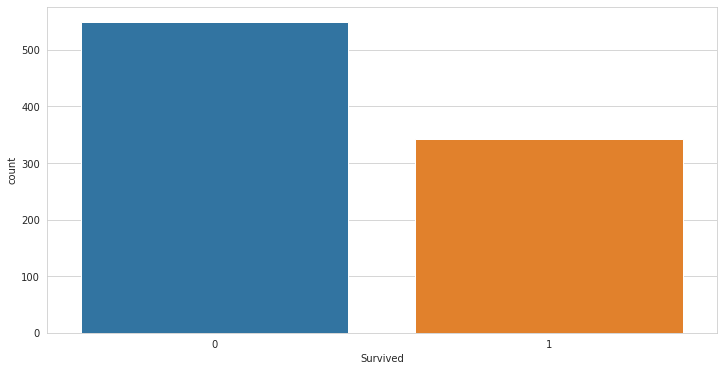

In [14]:
sns.countplot(x='Survived',data=train_df)

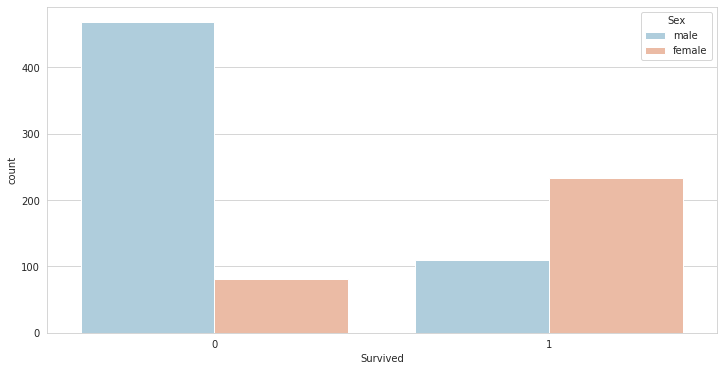

In [15]:
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='RdBu_r')

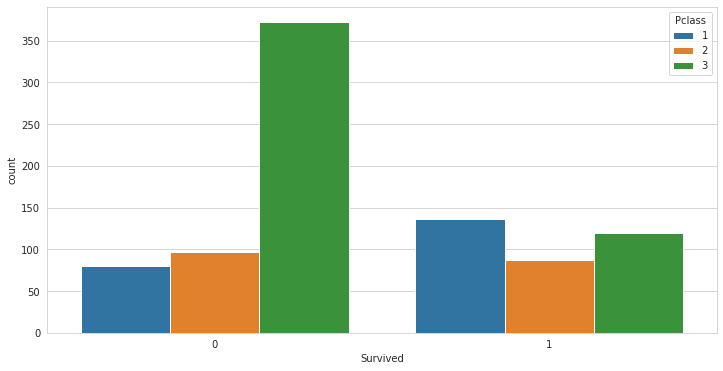

In [16]:
sns.countplot(x='Survived',hue='Pclass',data=train_df)

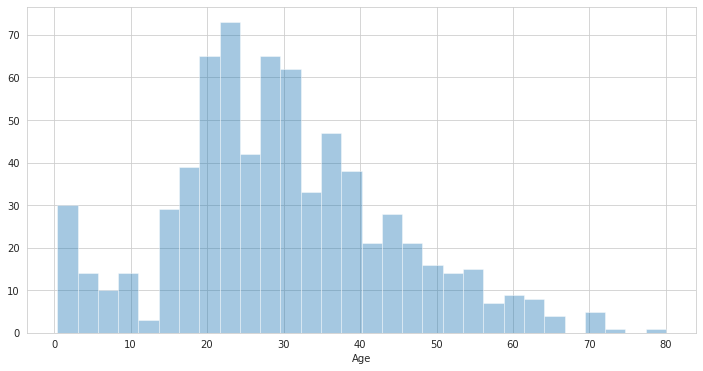

In [17]:
sns.distplot(train_df['Age'].dropna(),kde=False,bins=30)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


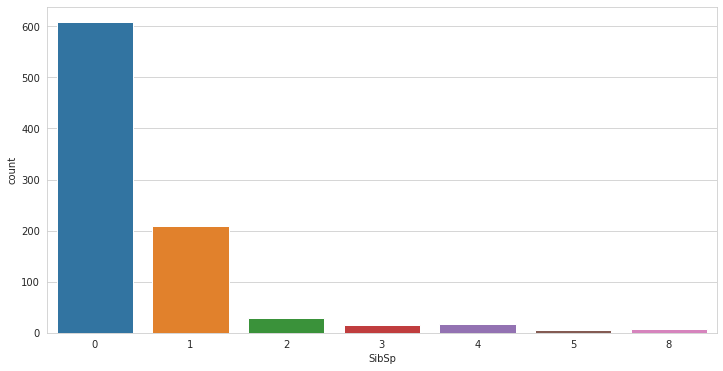

In [19]:
sns.countplot(x='SibSp',data=train_df)

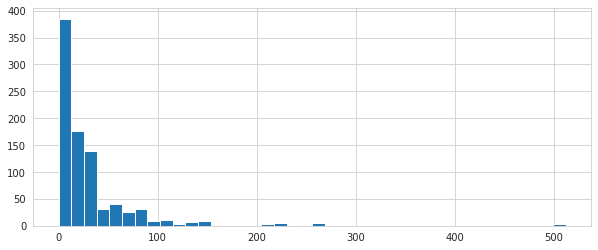

In [20]:
train_df['Fare'].hist(bins=40,figsize=(10,4))

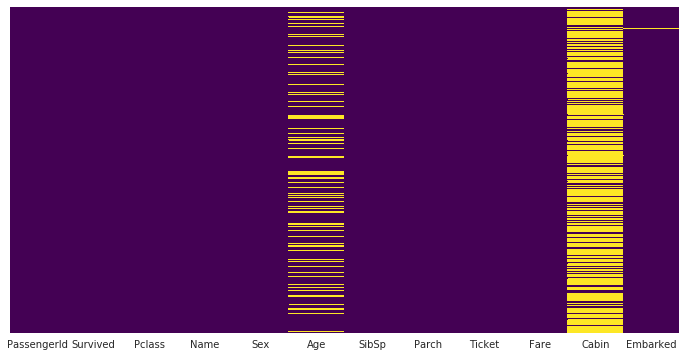

In [25]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')